In [5]:
import pandas as pd
from pandas import read_csv
datas=read_csv('C:/Users/HP/Desktop/vandhana/project.csv')
df=pd.DataFrame(datas)
df

,gp,grp,vol,gi
0,4.216,0.418,234.84,18.4
1,5.360,0.436,233.63,23.0
2,5.374,NaN,233.29,23.0
3,5.388,NaN,233.74,23.0
4,3.666,0.522,235.68,15.8
...,...,...,...,...
144,3.380,0.156,232.81,14.4
145,3.404,0.160,233.77,14.4
146,3.378,0.156,232.82,14.4
147,3.388,0.158,233.22,14.4


In [6]:
df1=df.fillna(method="ffill")
df1

,gp,grp,vol,gi
0,4.216,0.418,234.84,18.4
1,5.360,0.436,233.63,23.0
2,5.374,0.436,233.29,23.0
3,5.388,0.436,233.74,23.0
4,3.666,0.522,235.68,15.8
...,...,...,...,...
144,3.380,0.156,232.81,14.4
145,3.404,0.160,233.77,14.4
146,3.378,0.156,232.82,14.4
147,3.388,0.158,233.22,14.4


In [7]:
import numpy as np
df1['grp']=(np.abs(df1['grp']-(np.mean(df1.grp)))/(np.std(df1.grp)))
df1['grp']

0      2.709771
1      2.861985
2      2.861985
3      2.861985
4      3.589230
         ...   
144    0.494213
145    0.528038
146    0.494213
147    0.511126
148    0.494213
Name: grp, Length: 149, dtype: float64

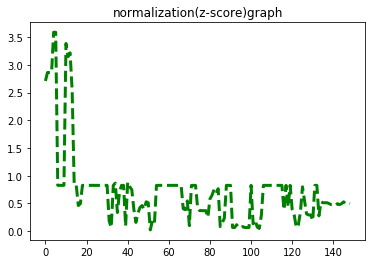

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure();df1['grp'].plot(title="normalization(z-score)graph",color="green",linestyle='dashed',linewidth=3);
plt.show()

the dataset graph


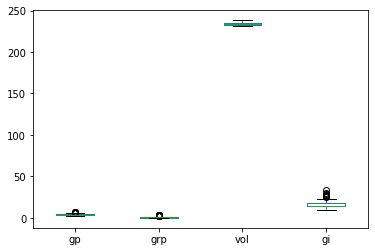

In [11]:
print("the dataset graph")
df1.plot(kind='box',subplots=False,layout=(10,10),sharex=False)
plt.show()

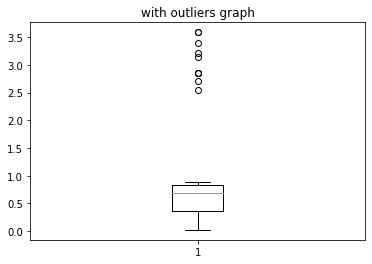

In [12]:
plt.title("with outliers graph")
plt.boxplot(df1['grp'])
plt.show()

In [13]:
print("with outliers output")
df1['grp'].describe()

with outliers output


count    149.000000
mean       0.718873
std        0.697486
min        0.020658
25%        0.368333
50%        0.680252
75%        0.824975
max        3.589230
Name: grp, dtype: float64

In [14]:
print("without outliers output")
def remove_outlier(df1_in,col_name):
    q1=df1_in[col_name].quantile(0.25)
    q3=df1_in[col_name].quantile(0.75)
    iqr=q3-q1
    fence_low=q1-1.5*iqr
    fence_high=q3+1.5*iqr
    df1_out=df1_in.loc[(df1_in[col_name]>fence_low)&(df1_in[col_name]<fence_high)]
    return df1_out
df2=remove_outlier(df1,'grp')
df2['grp'].describe()

without outliers output


count    139.000000
mean       0.549240
std        0.284842
min        0.020658
25%        0.329797
50%        0.528038
75%        0.824975
max        0.883204
Name: grp, dtype: float64

without outliers graph


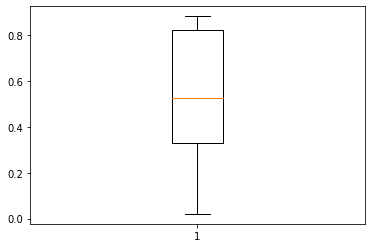

In [15]:
print("without outliers graph")
plt.boxplot(df2['grp'])
plt.show()

In [16]:
array=df1.values
x=array[:,0:2]
y=array[:,2]

In [18]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
y_kmeans=km.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

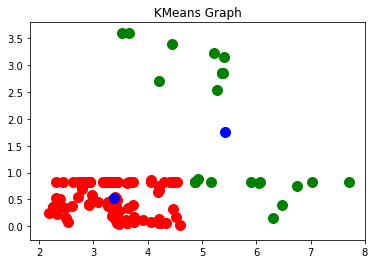

In [19]:
centers=km.cluster_centers_
plt.title("KMeans Graph")
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,color='green')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='blue',label='centroids')
plt.show()


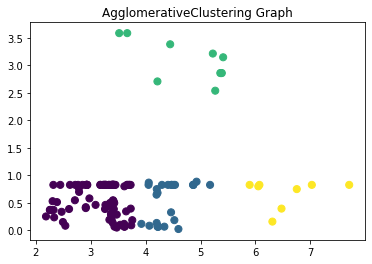

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=4,affinity='euclidean')
ag.fit(x)
ap=ag.fit_predict(x)
plt.title("AgglomerativeClustering Graph")
plt.scatter(x[:,0],x[:,1],c=ap,s=50)
plt.show()


